**Classificação e Processamento de Linguagem Natural**

O Processamento de Linguagem Natural pode ser considerado um dos maiores desafios da computação.

Contudo, ao aprender conceitos fundamentais, você poderá ver o quão útil a Linguagem Natural pode ser. Nesta parte, você realizará uma Análises de Sentimento de modo automatizado e conhecerá como criar visualizações para facilitar a análise de dados textuais.

Em seguida, você já poderá mergulhar em uma das principais bibliotecas Python para PLN. E o resultado de tudo isso? Você será capaz de criar aplicações que envolvam interpretação da linguagem humana!

# **Curso de Linguagem Natural parte 1:<br>Introdução a NLP com análise de sentimento**



## **Aula 01 - Dados Textuais: classificação e exploração**

**1 - Introdução**

Iniciaremos o curso criando um analisador de sentimentos. Imaginemos que queremos assistir um filme, e o busquemos críticas sobre ele na internet. Você lê, interpreta, e classifica a resenha como boa ou ruim. É exatamente isso que ensinaremos o computador a fazer. Para isso, importaremos uma base de dados já classificada, depois criaremos um modelo de Machine Learning capaz de interpretar a linguagem humana e classificar o texto.

Utilizaremos algumas visualizações como as word clouds para obtermos insights sobre como podemos melhorar, que pré-processamentos podemos fazer em nossos textos para torná-los mais interpretáveis o possível, para que o computador entenda melhor o que é um sentimento ruim e um sentimento positivo.

Também iremos criar um pareto que nos auxiliará na análise desses dados. Depois, aprenderemos o que é tokenização, e a utilizar o nltk, que é uma das principais bibliotecas do mundo do Processamento de Linguagem Natural.

**2 - Machine Learning para classificar textos**

Iremos criar um modelo de Machine Learning capaz de analisar um determinado texto e classificá-lo de acordo com o sentimento, se a pessoa gostou ou não do texto. Para isso utilizaremos uma base de dados do IMDb (Internet Movie Database), uma plataforma que reúne dados de filmes, programas, comerciais, música e até de jogos.

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [28]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command
#!kaggle datasets download -d luisfredgs/imdb-ptbr
#unzipping the zip files and deleting the zip files
#!unzip \*.zip  && rm *.zip

/content/gdrive/My Drive/Kaggle


In [65]:
# Importando as bibliotecas necessárias:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Visualizacao
%matplotlib inline

In [15]:
resenha = pd.read_csv("imdb-reviews-pt-br.csv")
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


O texto da base de dados é como se fosse uma resenha, a opinião da pessoa em relação a um determinado filme, então chamaremos este dado de resenha = pd.read_csv("dados/imdb-reviews-pt-br.csv"), que é onde se encontram os dados.

Obtemos uma tabela contendo id, o texto em inglês, o mesmo em português, e o sentimento correspondente. Ou seja, se no texto a opinião da pessoa é negativa ou positiva.

In [18]:
resenha.shape

(49459, 4)

A tabela possui quatro colunas e aproximadamente 50 mil linhas, isto é, resenhas. Isso é um número suficiente para conseguirmos treinar o modelo para a classificação do sentimento.

In [19]:
treino, teste, classe_treino, classe_teste = train_test_split(resenha['text_pt'],
                                                              resenha['sentiment'],
                                                              random_state=42)

Queremos os dados de treino, teste, a classe_treino e classe_teste. Usaremos o train_test_split, para o qual passaremos a coluna que queremos segregar, no caso, text_pt, para classificarmos os textos em português.

In [24]:
from sklearn.linear_model import LogisticRegression

Importamos o SKLearn Linear Model Logistic Regression para realizarmos o treinamento e depois a classificação. E então precisaremos treinar, e para tal criaremos a variável regressao_logistica, que recebe LogisticRegression. Depois, chamaremos .fit para treinar com os dados de treino e as labels de treino, classe_treino.

In [22]:
regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)

ValueError: ignored

Erro! Não foi possível converter string para float. Nossa, que interessante. Isso porque os nossos textos não estão da maneira como os modelos de Machine Learning conseguem interpretar. E é nesse ponto que o NLP entra, o PLN — Processamento de Linguagem Natural é responsável pela realização desta interpretação, transformando o texto em algo legível para máquinas.

**03 - Explorando dados textuais**

Precisamos conhecer um pouco mais sobre os nossos textos, a nossa base de dados, como ela se comporta, se são textos longos, curtos, se temos dicas que podem existir no texto, para os classificarmos como sendo positivos ou negativos, isso tudo pode facilitar na criação do modelo.

Conhecer um pouco dos textos é importante, e irá nos ajudar a melhorar a modelagem, ou seja, salientar as palavras mais importantes, aquilo que é fundamental.

In [26]:
print("Negativa \n")
print(resenha['text_pt'][189])

Negativa 

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [27]:
print("Positivo \n")
print(resenha['text_pt'][49002])

Positivo 

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maio

In [30]:
resenha['sentiment'].value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

Verificar se os dados estão relativamente proporcionais, isso é, se a mesma quantidade de dados negativos que temos é próxima da de positivos. Pois se forem números desproporcionais, precisaremos de outra tratativa, que é a classificação de dados desbalanceados.

In [31]:
resenha['classificacao'] = resenha['sentiment'].replace(['neg', 'pos'], [0,1])

Criando uma coluna classificacao binária com base na coluna sentiment.

In [33]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


## **Aula 02 - Bag of Words: criando representações da linguagem humana**

**2 - Usando Dados Rotulados**

Estamos usando o dataset IMDB, ele contém críticas de filmes e seu respectivo sentimento, positivo ou negativo. Talvez algo que você possa estar se perguntando é se os dados não estivessem classificados, ou seja se nosso dataset fosse apenas de texto sem o rótulo de sentimento? Será que ainda seria possível classificar sentimentos? Como poderíamos identificar os sentimentos positivos e negativos?

Bom quando temos dados rotulados podemos utilizar algoritmos de machine learning supervisionado para realizar a classificação de sentimento. Basicamente nos métodos supervisionados temos um "professor" (rótulos) que serve para avaliar a resposta (previsões) e assim o modelo vai se adaptando de acordo com as orientações dos "professor". Agora se não temos os dados rotulados podemos utilizar algoritmos de machine learning não supervisionados, ou seja, nesta forma de aprendizagem não temos o "professor" portanto o algoritmo utilizado terá que descobrir sozinho relações, padrões regularidades e categorias nos dados.

Então caso os nossos dados não fossem rotulados com os sentimentos poderíamos utilizar técnicas de aprendizado não supervisionados para encontrar categorias que iriam representar o sentimento negativo e sentimento positivo. Ok, mas você pode se perguntar e se eu não quiser usar aprendizado não supervisionado, o que fazer?

Neste caso podemos temos algumas saídas, a primeira é ler todos as resenhas e você mesmo classificar como positivo ou negativo e depois usar aprendizado supervisionado. Mais uma maneira é usar um modelo treinado com uma outra fonte de dados rotulados e aplica-lo para classificar os dados de interesse (Quando tiver que essa abordagem o ideal é buscar modelos treinados com base de dados mais similar possível com a que pretende classificar.

**03 - Bags of words**

No próximo vídeo Bag of Words - um exemplo em Python, minuto 9:00 usamos a função `pandas.SparseDataFrame`. Mas essa classe foi depreciada, portanto neste nosso exemplo devemos usar `DataFrame.sparse.from_spmatrix`. Abaixo segue a explicação de matriz esparsa e como utilizar o `DataFrame.sparse.from_spmatrix`.

Se você já conhece a biblioteca **Pandas** do Python, deve conhecer uma estrutura chamada **Dataframe**. Essa estrutura é utilizada para armazenar e manipular matrizes e é muito utilizada na área de analise de dados.

Nesse curso estamos usando o *dataset* IMDB que possui quase 50 mil linhas. Esse é um conjunto de dados grande e podemos utilizar um dataframe do pandas para guardar as informações dele.

Como acabamos de ver o *Bag of Words* irá criar uma *label* para cada palavra do nosso *dataset*. Acontece que isso ocupa uma quantidade grande de memória do computador. Só que dentro desse da nossa representação *Bag of Words* temos muitas linhas e colunas com valores nulos. será que vale a pena armazenar espaço na memória para guardar essa matriz muito grande cheias de zeros? (Essa matriz cheia de zeros são chamadas de **matriz esparsa**)

Bom não parece muito eficiente, armazenar toda essa matriz é um desperdício de memória, processamento e pode levar até ao *overflow* de memória. Para evitar esse tipo de problema foi criado uma estrutura específica para gerenciar as matrizes cheias de zeros, onde apenas os elementos com valor diferentes de zero e alguma estrutura adicional de controle são armazenadas.

Em nosso curso usaremos alguns recursos que irá nos retornar uma matriz esparsa, como será necessário visualizar essa matriz vamos utilizar o `DataFrame.sparse.from_spmatrix` do pandas para criar um **Dataframe** e visualizar nossa matriz esparsa como uma tabela.

Abaixo segue um exemplo de como usar o `DataFrame.sparse.from_spmatrix`:

 `pandas.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names())`

Então o `DataFrame.sparse.from_spmatrix` recebe uma matriz esparsa (variável matriz_esparsa) e nos retorna um Dataframe (variável DataFrame).

Para maiores informações você pode acessar esse [link](https://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#sparse-migration).

**5 - Bags of Words: em exemplo em Python**

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
texto = ['Assisti um Filme ótimo', 'Assisti um filme ruim']

vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(texto)
bag_of_words

<2x6 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [49]:
vetorizar.get_feature_names()

['Assisti', 'Filme', 'filme', 'ruim', 'um', 'ótimo']

In [55]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names())

In [56]:
matriz_esparsa

,Assisti,Filme,filme,ruim,um,ótimo
0,1,1,0,0,1,1
1,1,0,1,1,1,0


**6 - Bag of Words - aplicando em um caso real**

In [58]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(resenha['text_pt'])
bag_of_words.shape

(49459, 50)

In [63]:
treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              resenha['classificacao'],
                                                              random_state=42)
regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)
acuracia.round(3)

0.658

**07 - Criando uma função para classificar sentimentos**

O modelo acima apresentou uma acurácia de 66%

In [64]:
def classificar_texto (texto, coluna_texto, coluna_classificacao):
  vetorizar =  CountVectorizer(lowercase=False, max_features=50)
  bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
  treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              texto[coluna_classificacao],
                                                              random_state=42)
  regressao_logistica = LogisticRegression()
  regressao_logistica.fit(treino, classe_treino)
  return regressao_logistica.score(teste, classe_teste)
print(classificar_texto(resenha, "text_pt", "classificacao"))

0.6583097452486858


## **Aula 03: Visualizando os dados com WordCloud**

Word cloud é uma imagem gerada com as principais palavras de um texto distribuídas em um espaço, de modo que o tamanho de cada palavra é proporcional à sua frequência de aparição nos dados.

**02 - WordCloud - Conhecendo a visualização**

In [76]:
from wordcloud import WordCloud

In [81]:
todas_palavras = ' '.join([texto for texto in resenha['text_pt']])

In [82]:
len(todas_palavras)

63448424

In [79]:
len(todas_palavras)

63398966

In [80]:
nuvem_palavras = WordCloud().generate(todas_palavras)

In [83]:
nuvem_palavras

In [85]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show>

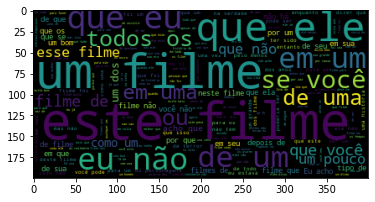

In [86]:
plt.figure()
plt.imshow(nuvem_palavras)
plt.show

 **04 - Segregando entre negativo e positivo**

Separando o dataframe em positivo e negativo. 

In [94]:
def nuvem_palavras_neg (texto, coluna_texto):
  texto_negativo = texto.query("sentiment == 'neg'")
  todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])
  nuvem_palavras = WordCloud(width=800, height=500,
                             max_font_size=110,
                             collocations=False).generate(todas_palavras)
  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation= 'bilinear')                           
  plt.axis('off')
  plt.show()

In [95]:
def nuvem_palavras_pos (texto, coluna_texto):
  texto_positivo = texto.query("sentiment == 'pos'")
  todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])
  nuvem_palavras = WordCloud(width=800, height=500,
                             max_font_size=110,
                             collocations=False).generate(todas_palavras)
  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation= 'bilinear')                           
  plt.axis('off')
  plt.show()

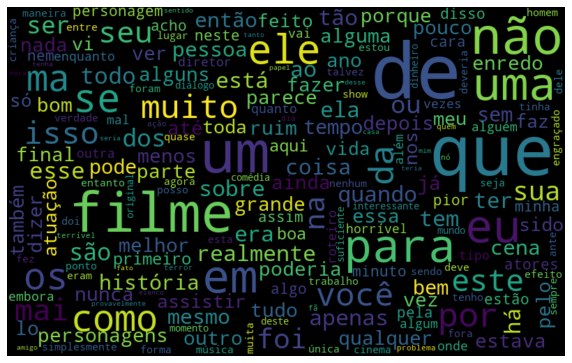

In [96]:
nuvem_palavras_neg(resenha, "text_pt")

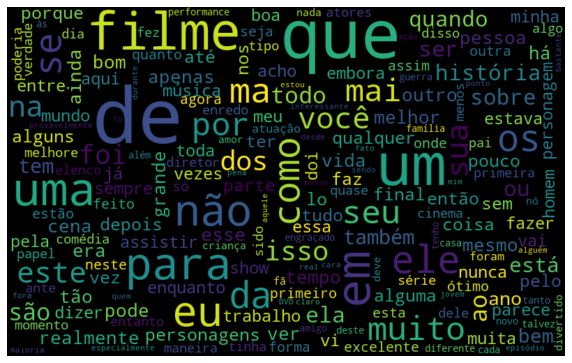

In [97]:
nuvem_palavras_pos(resenha, "text_pt")

## **Aula 04: Tokenização e a bliblioteca NLTK**

**02 - Conhecendo a biblioteca NLTK**

In [98]:
import nltk

In [ ]:
nltk.download('all')

In [102]:
# Calculando a frequência das palavras
frase = ['um filme ruim', 'um filme bom']
frequencia = nltk.FreqDist(frase)
frequencia

FreqDist({'um filme bom': 1, 'um filme ruim': 1})

**03 - Tokenização**

*A tokenização é o processo de receber um texto e separar suas palavras ou pontuação de acordo com um tipo de separação específica, gerando os chamados tokens, que são as partes segregadas daquele texto. Nesta aula usamos como separador o espaço em branco, mas temos outras formas de separar nosso texto.*

 Esse processo de criar tokens e separar cada palavra da nossa frase se chama Tokenização, no PLN. E existem diversos algoritmos de tokenização, aqui utilizaremos, primeiramente, a separação por espaço em branco, ou seja, as palavras serão divididas por um espaço em branco.

Da biblioteca *NLTK*, importaremos o `tokenize`, que comporta diversos algoritmos de tokenização. Para exemplificar, criaremos uma nova frase, contida na variável frase, "Bem vindo ao mundo do PLN!". Faremos a separação palavra a palavra criando um *token_espaco* e usar o `tokenize`.

In [103]:
from nltk import tokenize

frase = "Bem vindo ao mundo do PLN!"

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
token_frase

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']

Precisamos tokenizar nossos dados, mas faremos algo a mais e aproveitaremos para juntar as duas últimas células criadas no Notebook, para calcularmos a nossa frequência. Para isso, precisaremos de todo o nosso corpus em uma única lista — já fizemos isto anteriormente, quando criamos a variável todas_palavras.

Assim, podemos tokenizar não a frase, mas todas_palavras, e em frequencia queremos passar como parâmetro de FreqDist a saída da tokenização, que será token_frase. Poderia ter aparecido um warning pois estamos lidando com muitos dados, e estamos extrapolando o limite do Kernel, e tudo o mais, mas não apareceu, que bom.

Verificamos a saída de frequencia, um dicionário das nossas frequências, isto é, contendo a palavra e a sua respectiva frequência. Por exemlo, temos "de" 417651 vezes no corpus textual, é um volume de dados muito grande. Mas esta visualização não é muito agradável. Agora, conseguiríamos indicar quais são as que mais ou menos ocorrem, mas visualizar desta forma não é muito legal.

Vamos primeiro, então, criar um DataFrame com tais frequências, com as quais já estamos familiarizados, e ficamos com uma visualização bem mais agradável, df_frequencia, que será igual a pd.DataFrame. Queremos que uma coluna seja a Palavra, e passaremos a ela uma lista das nossas palavras, frequencia.keys, para que se retornem apenas as chaves do nosso dicionário.

E então queremos que a outra coluna seja Frequência, que será uma lista das nossas values, portanto frequencia.values. Criamos o nosso DataFrame, que rodaremos e verificaremos. Por termos solicitado o cálculo da frequência novamente, o Notebook demora um pouco para dar um retorno. Vamos dar uma olhada em como ficou o DataFrame rodando df_frequencia.

Desta vez, temos uma coluna para palavra, outra para a sua frequência correspondente. Legal, né? Visualizar como um DataFrame é mais interessante do que como um dicionário, podemos utilizar métodos já conhecidos dentro do DataFrame, para quem já conhece Pandas, e tudo o mais, como por exemplo o método nlargest, que fará a ordenação de uma quantidade determinada de palavras com maior frequência, se passarmos columns = "Frequência" e n = 10.

As palavras com maior frequência envolvem "de", "que", "e", "uma", e outras, que não nos agregam tanto semanticamente. De cara, já vemos que podemos remover tais palavras de uso mais comum, mas antes disso vamos criar uma visualização. Ver pelo DataFrame é legal, mas algo visual sempre é melhor. Vamos fazer isso?

In [104]:
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

In [106]:
# Criando um dataframe com a frequencia 
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                              "Frequencia": list(frequencia.values())})

In [108]:
#Ordenando o dataframe por frequencia n primeiras palavras com maior frequencia(nlargest)
df_frequencia.nlargest(columns="Frequencia", n=10)

,Palavra,Frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


## **Aula 05:  Uma nova visualização e os stop words**

**02 - Pareto: criação e exploração**

In [109]:
# Importando biblioteca necessária:
import seaborn as sns

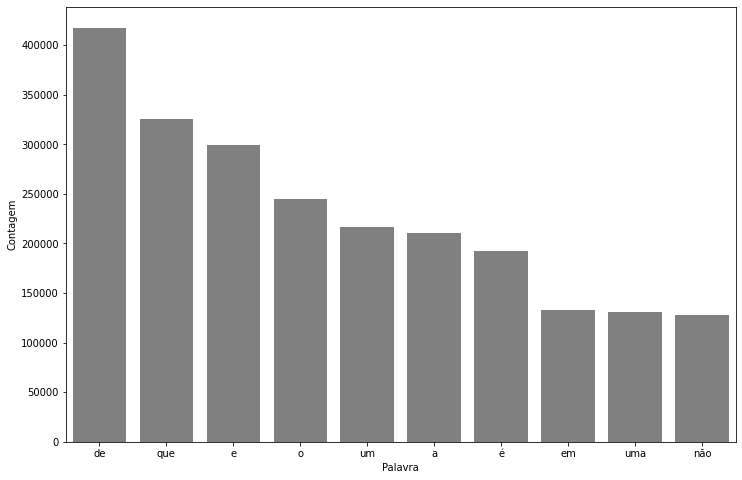

In [111]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x= "Palavra", y="Frequencia", data=df_frequencia.nlargest(columns="Frequencia", n=10), color='gray')
ax.set(ylabel = "Contagem")
plt.show()

**03 - Criando uma função**

In [114]:
def pareto(texto, coluna_texto, quantidade):
  todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
  token_frase = token_espaco.tokenize(todas_palavras)
  frequencia = nltk.FreqDist(token_frase)
  df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                "Frequencia": list(frequencia.values())})
  df_frequencia = df_frequencia.nlargest(columns="Frequencia", n = quantidade)
  total = df_frequencia['Frequencia'].sum()
  df_frequencia['Porcentagem'] = df_frequencia['Frequencia'].cumsum() / total*100

  plt.figure(figsize=(12,8))
  ax = sns.barplot(x="Palavra", y="Frequencia", data=df_frequencia, color='gray')
  ax2 = ax.twinx()
  sns.lineplot(x="Palavra", y="Porcentagem", data=df_frequencia, color='red', sort=False, ax=ax2)
  ax.set(ylabel = "Contagem")
  plt.show()

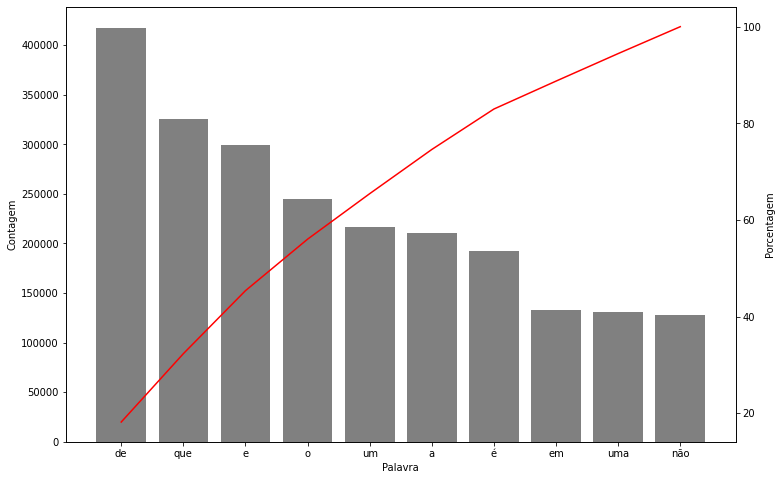

In [115]:
pareto(resenha, "text_pt", 10)

**05 - Stop Words: removendo o que não agrega**

*As **stop words** são palavras que não apresentam relevância em determinado contexto e podem ser removidas sem perda semântica da frase. Essa lista não é fixa e universal, podendo ser alterada dependendo do contexto e idioma.*

Essas palavras que não nos agregam pelo menos semanticamente e são irrelevantes são chamadas, em Processamento de Linguagem Natural, de Stop words, e existe uma lista padrão delas. Para podermos ter acesso a ela, importamos do nltk. Criaremos, então, palavras_irrelevantes, que será igual a `nltk.corpus.stopwords.words`.

In [120]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
print(palavras_irrelevantes)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

### O **tratamento_1** é o nosso text_pt, o texto em português, sem as Stop words. 

In [128]:
# Criando o tratamento 1 
frase_processada = list()
for opiniao in resenha.text_pt:
  nova_frase = list()
  palavras_texto = token_espaco.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in palavras_irrelevantes:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

resenha["tratamento_1"] = frase_processada

In [123]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [125]:
classificar_texto(resenha, 'tratamento_1', 'classificacao').round(3)

0.661

In [126]:
classificar_texto(resenha, 'text_pt', 'classificacao').round(3)

0.658

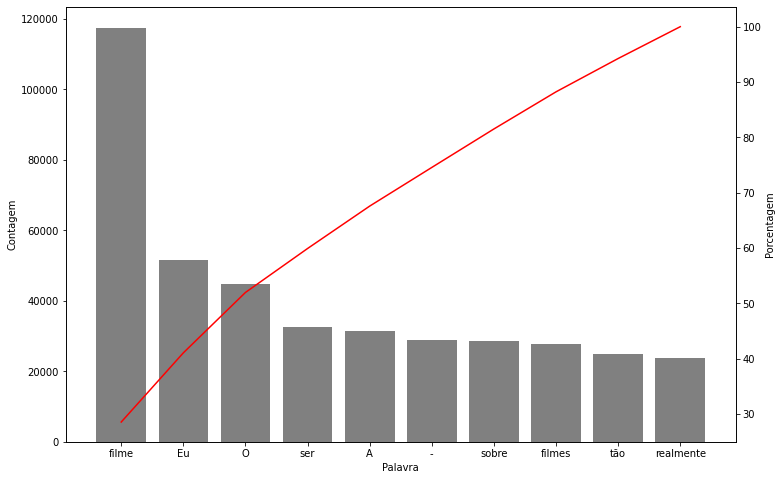

In [127]:
pareto(resenha, "tratamento_1", 10)

# **Curso  Linguagem Natural parte 2:<br> Continuando com a análise de sentimento**

## **Aula 01: Otimizando a análise: o primeiro passo**

**02 - Stopwords além dos textos**

**Stop words** (ou palavras de parada – tradução livre) são palavras que podem ser consideradas "*irrelevantes*" para um conjunto de texto. Os stop words geralmente inclue preposições e artigos, mas não são um conjunto fechado de palavras, você pode adicionar ou remover conforme sua necessidade.

## **Aula 02:  Removendo a pontuação do dataset**

`WordPunctTokenizer` nós evitamos que palavras seguidas de pontuação sejam consideradas diferentes.

In [129]:
from string import punctuation

In [130]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [133]:
#Criando uma lista com as pontuacoes
pontuacao = list()
for ponto in punctuation:
  pontuacao.append(ponto)

In [134]:
pontuacao

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [141]:
# Criando o tratamento_2:
pontuacao_stopwords = pontuacao + palavras_irrelevantes

token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)

frase_processada = list()
for opiniao in resenha["tratamento_1"]:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in pontuacao_stopwords:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

resenha["tratamento_2"] = frase_processada

In [140]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...


In [142]:
resenha["tratamento_1"][0]

'Mais vez, Sr. Costner arrumou filme tempo necessário. Além terríveis seqüências resgate mar, quais poucas, simplesmente importei nenhum personagens. A maioria fantasmas armário, personagem Costers realizado logo início, esquecido tarde, importava. O personagem deveríamos importar arrogante superconfiante, Ashton Kutcher. O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, bem além meio caminho, Costner conta sobre fantasmas Kutchers. Somos informados Kutcher levado ser melhor pressentimentos presságios anteriores. Nenhuma mágica aqui, tudo podia fazer desligar hora.'

In [143]:
resenha["tratamento_2"][0]

'Mais vez Sr Costner arrumou filme tempo necessário Além terríveis seqüências resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armário personagem Costers realizado logo início esquecido tarde importava O personagem deveríamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado Seu único obstáculo parece estar vencendo Costner Finalmente bem além meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos presságios anteriores Nenhuma mágica aqui tudo podia fazer desligar hora'

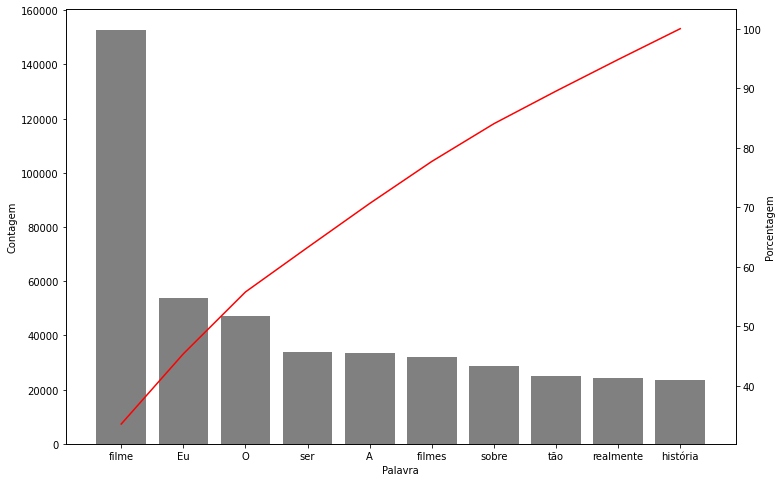

In [144]:
pareto(resenha, "tratamento_2", 10)

## **Aula 03: Normalização de textos**

**02 - Removendo pontuação**

In [146]:
!pip install unidecode

     |████████████████████████████████| 245kB 3.2MB/s 


In [147]:
import unidecode

acentos = 'ótimo péssimo não é tão'

teste = unidecode.unidecode(acentos)
print(teste)

otimo pessimo nao e tao


In [148]:
sem_acentos = [unidecode.unidecode(texto) for texto in resenha["tratamento_2"]]

In [149]:
sem_acentos[0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece estar vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

In [150]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [152]:
resenha["tratamento_3"] = sem_acentos

frase_processada = list()
for opiniao in resenha["tratamento_3"]:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in pontuacao_stopwords:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

resenha["tratamento_3"] = frase_processada

**03 - Medindo os resultados e comparando**

In [154]:
acuracia_tratamento3 = classificar_texto(resenha, "tratamento_3", "classificacao").round(3)
print(acuracia_tratamento3)

0.681


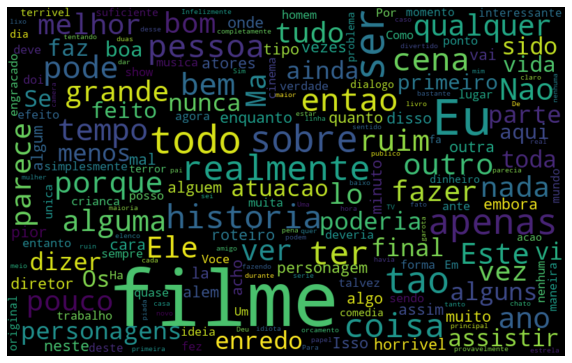

In [157]:
nuvem_palavras_neg(resenha, "tratamento_3")

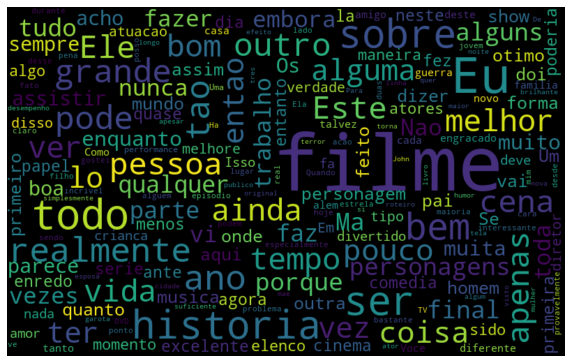

In [158]:
nuvem_palavras_pos(resenha, "tratamento_3")

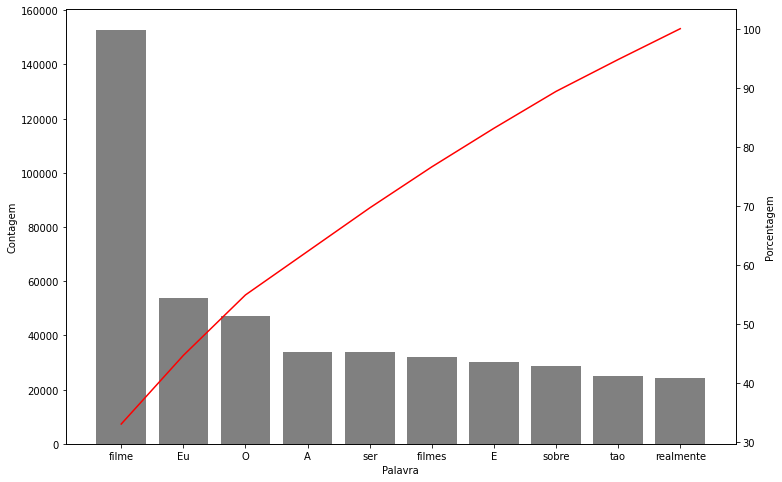

In [160]:
pareto(resenha, "tratamento_3", 10)

**04 - Transformando em minúsculo**

Realizar a remoção de acentos auxilia a classificação corrigindo erros ortográficos. Por sua vez, converter as palavras em letra minúscula normaliza todos os textos, fazendo, por exemplo, com que palavras do início de frases se tornem minúsculas também.

In [175]:
# Criando o tratamento_4
frase_processada = list()
for opiniao in resenha["tratamento_3"]:
  nova_frase = list()
  opiniao = opiniao.lower()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acento:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

resenha["tratamento_4"] = frase_processada

KeyboardInterrupt: ignored

In [163]:
resenha["text_pt"][0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [164]:
resenha["tratamento_4"][0]

'vez sr costner arrumou filme tempo necessario alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens maioria fantasmas armario personagem costers realizado logo inicio esquecido tarde importava personagem deveriamos importar arrogante superconfiante ashton kutcher problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado unico obstaculo parece estar vencendo costner finalmente bem alem meio caminho costner conta sobre fantasmas kutchers informados kutcher levado ser melhor pressentimentos pressagios anteriores nenhuma magica aqui tudo podia fazer desligar hora'

In [166]:
acuracia_tratamento4 = classificar_texto(resenha, "tratamento_4", "classificacao").round(3)
print(acuracia_tratamento4)
print(acuracia_tratamento3)

0.688
0.681


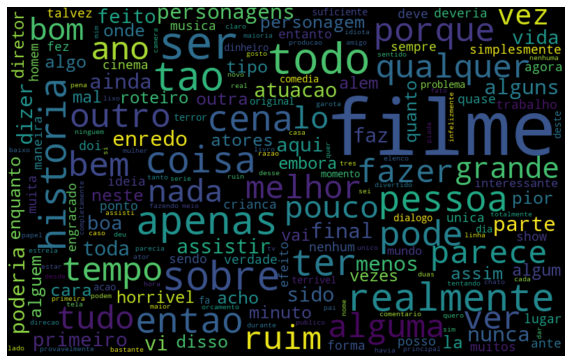

In [167]:
nuvem_palavras_neg(resenha, "tratamento_4")

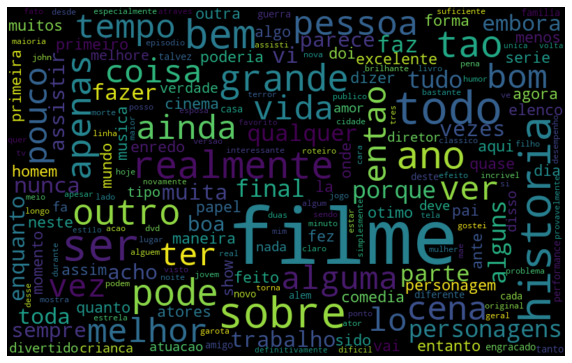

In [168]:
nuvem_palavras_pos(resenha, "tratamento_4")

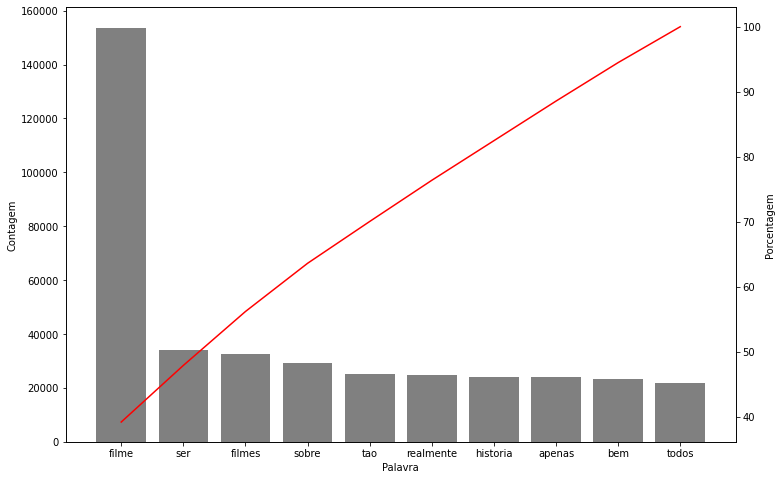

In [169]:
pareto(resenha, "tratamento_4", 10)

## **Aula 04: Evitando flexões e derivações nas palavras**

**02 - RSLP Stemmmer (Removedor de Sufixos da Lingua Portuguesa)**

Em processamento de linguagem natural, o processo de reduzir os elementos a um radical comum é chamado de "stemização" - ou seja, reduzir uma palavra com determinadas variações a um radical comum. 

Portanto, vamos melhorar ainda mais os nossos dados tratando esses casos, e faremos isso por meio da biblioteca *nltk*. Dessa biblioteca, importaremos um algoritmo chamado `RSLP`, que remove os sufixos das palavras, transformando-as em um único radical comum.

In [174]:
stemmer = nltk.RSLPStemmer()
stemmer.stem("corredor")

'corr'

Como exemplo, vamos rodar o `RSLPStemmer()` para as palavras "corredor", "corre" e "correria":





In [176]:
# Criando o tratamento_5
frase_processada = list()
for opiniao in resenha["tratamento_4"]:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  for palavra in palavras_texto:
      nova_frase.append(stemmer.stem(palavra))
  frase_processada.append(' '.join(nova_frase))

resenha["tratamento_5"] = frase_processada

In [178]:
acuracia_tratamento5 = classificar_texto(resenha, "tratamento_5", "classificacao").round(3)
print(acuracia_tratamento5)
print(acuracia_tratamento4)

0.694
0.688


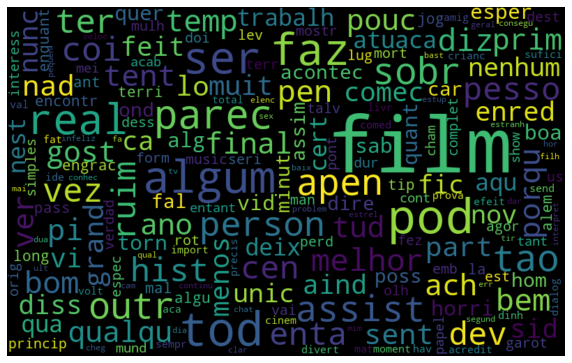

In [179]:
nuvem_palavras_neg(resenha, "tratamento_5")

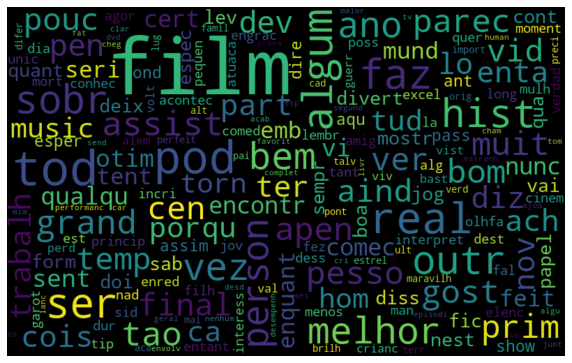

In [180]:
nuvem_palavras_pos(resenha, "tratamento_5")

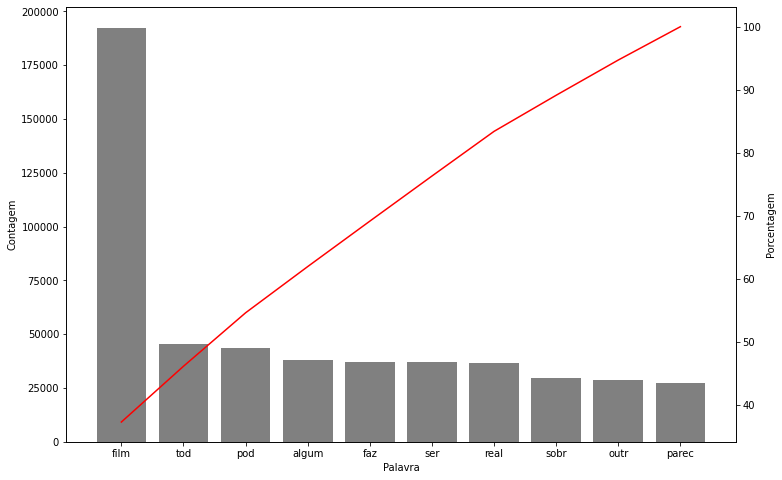

In [182]:
pareto(resenha, "tratamento_5", 10)

O conceito de stemização é muito importante para o trabalho com processamento de linguagem natural. Existem outros algoritmos de stemização já implementados no NLTK. É importante salientar que cada língua tem um stemizador diferente: no nosso caso, estamos utilizando um específico para o Português, mas existe, por exemplo, o Porter para o Inglês.

## **Aula 05:   TF-IDF e Ngrams: técnicas mais avançadas**

**02 - TF-IDF**

Já realizamos ótimos tratamentos que nos trouxeram benefícios incríveis, portanto não mexeremos mais no texto, mas sim com vetorização: aprenderemos uma nova forma de contarmos as palavras do nosso saco de palavras, chamada TF-IDF (Frequência dos Termos - Inverso da Frequência do Documento).